# Inferential Statistics

<h3> Springboard project to apply inferential statistics in my capstone project. </h3>  
Use this to gain more insight into my EDA.

***
<h2>CREDIT CARD DEFAULTS</h2>  
*** 

<h3> The Data: </h3>  
<p>UC Irvine Machine Learning Repository has a file on credit card defaults from Taiwan in 2005.    https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients  
The set of 30,000 includes whether the account defaulted in the next month, as well as demographic and account data, including: gender, marital status, education attained, age, amount of household credit, and 6 month history of credit balance, payments, and defaults. 
(In 2003, the exchange rate was 1USD to 34 Taiwanese Dollars.) </p>

<div class="span5 alert alert-info">
<p>Attribute Information:
<p>
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:  

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.  

SEX: Gender (1 = male; 2 = female).  

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).   

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).  

AGE: Age (year).  

PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005.  
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  

BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.  

PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.  </p>
</div>

In [4]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale

cc_file = '/Users/brentmarijensen/Desktop/credit_card.xls'
df = pd.read_excel(cc_file,header=1)
target = 'default payment next month'

#DATA CLEANING
clean_df = df
clean_df = clean_df.drop('ID', axis=1)

# valid EDUCATION codes are 1,2,3,4.  Change other codes to 4, meaning "others."
for i in range (len(clean_df)):
    if clean_df['EDUCATION'][i] < 1:
        clean_df['EDUCATION'][i] = 4
    elif clean_df['EDUCATION'][i] > 4:
        clean_df['EDUCATION'][i] = 4
        
# valid MARRIAGE codes are 1,2,3.  Change other codes to 3, meaning "other."
for i in range (len(clean_df)):
    if clean_df['MARRIAGE'][i] < 1:
        clean_df['MARRIAGE'][i] = 3     
        
# PAY_1 to PAY_6.  Change column name PAY_0 to PAY_1
# change negative entries to 0, indicating 0 months behind.  
# a positive integer represents the number of months behind.
clean_df=clean_df.rename(columns = {'PAY_0':'PAY_1'})
vars = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in range (len(clean_df)):
    for var in vars:
        if clean_df[var][i]<0:
            clean_df[var][i] = 0  
            
# Standardize the data frame, and create X for predictor variables, y for target
X = clean_df.drop('default payment next month', axis=1).values
y = clean_df['default payment next month'].values
X_scaled = scale(X)

/Users/brentmarijensen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


mean household credit: 167484.32266666667
max household credit: 1000000
min household credit: 10000
standard deviation: 129747.66156719506
30000


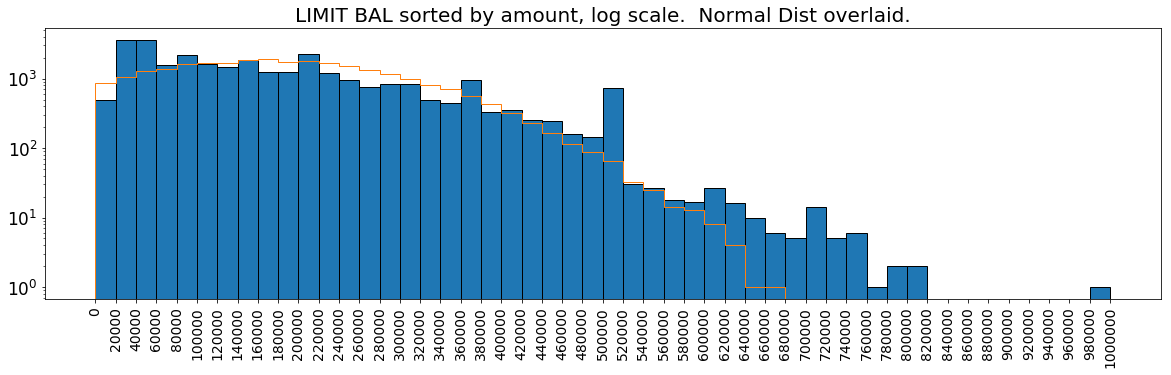

In [2]:
#limit balance, sorted by amount.  Compare it to a Normal distribution.
import matplotlib.pyplot as plt

housemean= clean_df['LIMIT_BAL'].mean()
print("mean household credit:", housemean)
print("max household credit:", clean_df['LIMIT_BAL'].max())
print("min household credit:", clean_df['LIMIT_BAL'].min())
houseSD= clean_df['LIMIT_BAL'].std()
print('standard deviation:', houseSD)
print(len(clean_df))

bins= np.arange(0,1020000,20000) #bins from 0 to 1 million, by 20,000 intervals
_= plt.figure(figsize=(20,5))
_= plt.hist(clean_df['LIMIT_BAL'], bins=bins, edgecolor="k")
_= plt.yscale("log")
_= plt.xticks(bins, rotation='vertical',size=14)
_= plt.yticks(size=17)
_= plt.title('LIMIT BAL sorted by amount, log scale.  Normal Dist overlaid.', size=20)
samples= np.random.normal(housemean,houseSD,30000)
_= plt.hist(samples, histtype='step', bins=bins)
plt.show()

The histogram approximately follows a normal distribution.  It's necessarily right skewed, since it is centered close to zero (the median is < 2 SDs from zero.)  This makes sense, because credit limits can be very low; indeed most new borrowers start out with a relatively low amount.  

In [3]:
# Calculate percentiles
percentiles = np.array([0.01,2.5,25,50,75,97.5,99.99])
ptiles= np.percentile(clean_df['LIMIT_BAL'], percentiles)
print(ptiles)

[ 10000.          20000.          50000.         140000.
 240000.         500000.         780001.99999995]


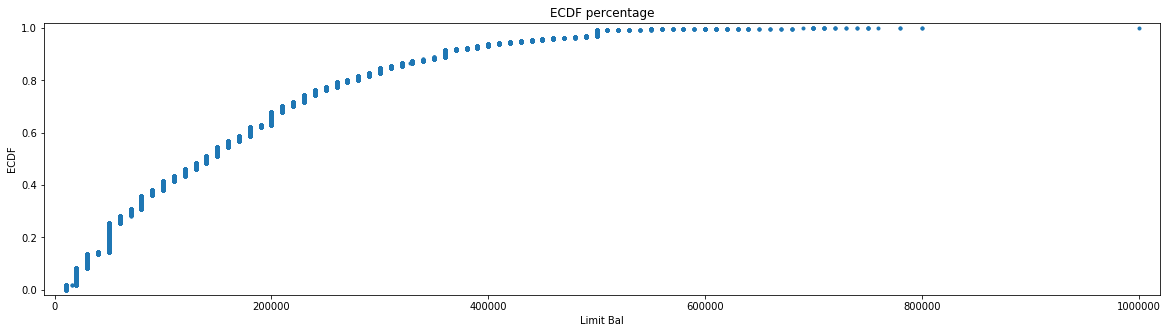

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Compute ECDF 
x, y = ecdf(clean_df['LIMIT_BAL'])
_= plt.figure(figsize=(20,5))
_= plt.plot(x,y,marker='.',linestyle='none')
_= plt.margins(0.02)
_= plt.xlabel('Limit Bal')
_= plt.ylabel('ECDF')
_= plt.title('ECDF percentage')
plt.show()

<h4>    </h4>

In [5]:
# Calculate variance (explicitly, not using np.var())
differences = np.array(housemean - clean_df['LIMIT_BAL'])
print(differences.mean())
diff_square = differences*differences
variance = np.mean(diff_square)
print("LIMIT_BAL (household credit) mean", housemean)
print("LIMIT_BAL (household credit) variance", variance)
print("LIMIT_BAL (household credit) std dev", np.sqrt(variance))

1.7881393432617186e-11
LIMIT_BAL (household credit) mean 167484.32266666667
LIMIT_BAL (household credit) variance 16833894533.63455
LIMIT_BAL (household credit) std dev 129745.49908815547


In [ ]:
# Count number of large accounts 
n= len(clean_df)
large = 500000
n_large = np.sum(clean_df['LIMIT_BAL'] > large)
print('number of large accounts',n_large)
p_large = n_large/n
print('Percentage of accounts over',large,':', p_large)

number of large accounts 206
Percentage of accounts over 500000 : 0.006866666666666667


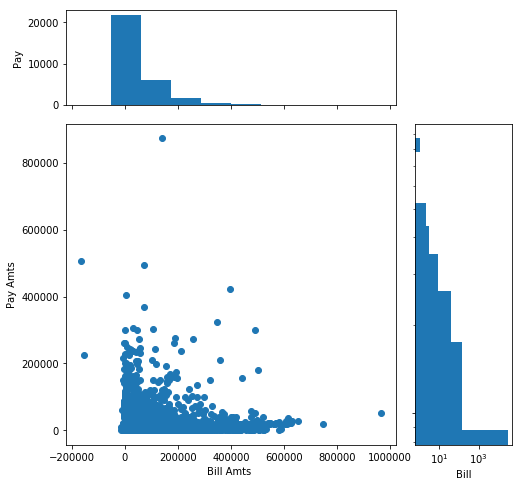

In [9]:
# scatter histogram combo for bill amount vs pay amount to look for visual correlation
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

x= clean_df['BILL_AMT1']
y= clean_df['PAY_AMT1']

fig = plt.figure(1, figsize=(8, 8))
gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])
_= plt.yscale("log")
_= plt.xscale("log")

ax_joint.scatter(x,y)
ax_marg_x.hist(x)
ax_marg_y.hist(y,orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('Bill Amts ')
ax_joint.set_ylabel('Pay Amts')

# Set labels on marginals
ax_marg_y.set_xlabel('Bill')
ax_marg_x.set_ylabel('Pay')
plt.show()

It's hard to see correlation because most pay amounts are below 100,000.  We see that pay amounts are less than the bill amounts.  
The most interesting part of this chart are the outliers.  Some bills are below 0.  Some payments exceed the bill amounts; these show errors or overpayments.

/Users/brentmarijensen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


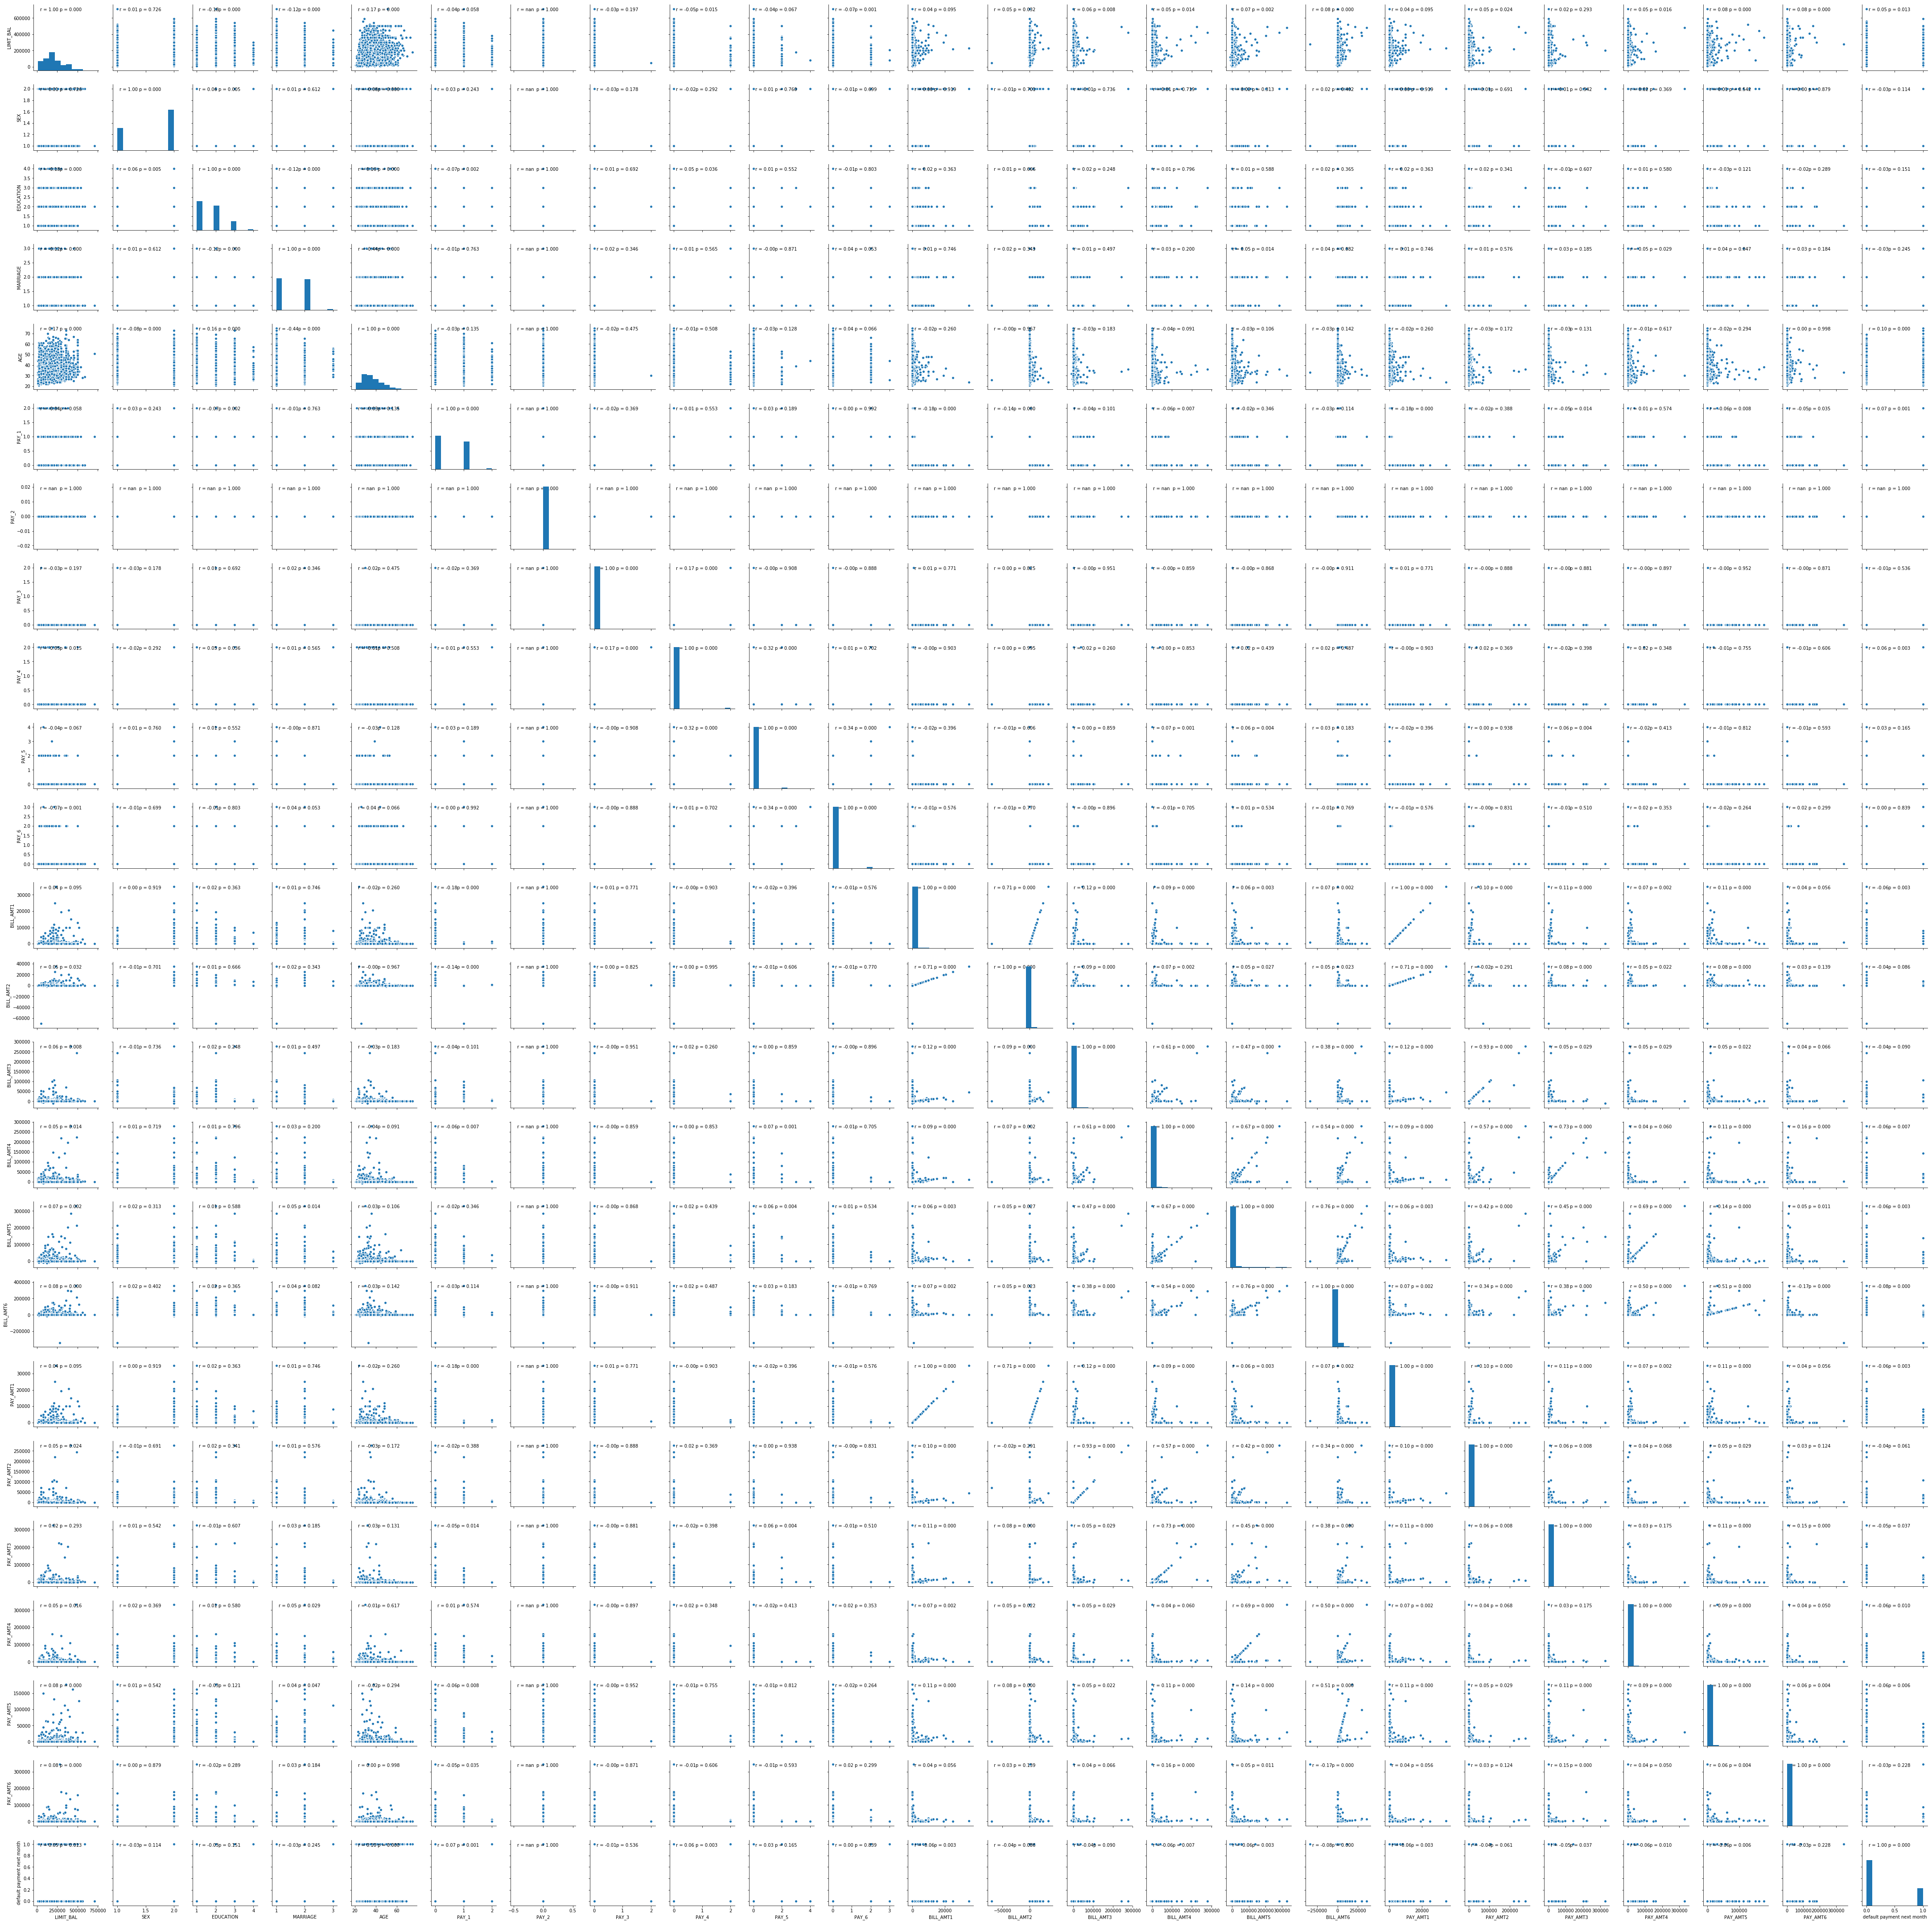

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)


dframe = clean_df[clean_df["BILL_AMT1"] == clean_df["PAY_AMT1"]]
graph = sns.pairplot(dframe)
graph.map(corrfunc)
plt.show()


In [5]:
import scipy.stats as stats
#import  statsmodels.formula.apistatsmode  as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols
model3= ols('BILL_AMT1 ~ PAY_AMT1', clean_df)
fitmodel= model3.fit()
print(fitmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              BILL_AMT1   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     602.1
Date:                Tue, 19 Jun 2018   Prob (F-statistic):          1.14e-131
Time:                        18:00:17   Log-Likelihood:            -3.7848e+05
No. Observations:               30000   AIC:                         7.570e+05
Df Residuals:                   29998   BIC:                         7.570e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.769e+04    444.869    107.203      0.0